### Preparation

"Meeting You (遇见你真好)" is a 2019 Chinese TV reality show. The program invited four single gentlemen and three single ladies to live in a villa in Shenzhen together. Every night, each of the participants provides the audience with the name of the person from the other gender as his/her most favorable person (only one name is allowed for each person). This social network analysis is based on the data from the first four nights. My objective is to analyze the role of each person in this small network. 'M1' to 'M4' are the four males; 'F1' to 'F3' are the three females.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
A = nx.DiGraph() # A is the network.
A.add_nodes_from(['M1', 'M2', 'M3', 'M4'], bipartite=0) # Four Gentlemen
A.add_nodes_from(['F1', 'F2', 'F3'], bipartite=1) # Three Ladies

In [3]:
A.add_edge('M1','F1',weight=0.25)
A.add_edge('M1','F3',weight=0.75)
A.add_edge('M2','F1',weight=0.25)
A.add_edge('M2','F2',weight=0.25)
A.add_edge('M2','F3',weight=0.5)
A.add_edge('M3','F1',weight=0.5)
A.add_edge('M3','F2',weight=0.25)
A.add_edge('M3','F3',weight=0.25)
A.add_edge('M4','F1',weight=0.25)
A.add_edge('M4','F2',weight=0.75)
A.add_edge('F1','M1',weight=0.5)
A.add_edge('F1','M2',weight=0.25)
A.add_edge('F1','M4',weight=0.25)
A.add_edge('F2','M3',weight=0.5)
A.add_edge('F2','M4',weight=0.5)
A.add_edge('F3','M1',weight=0.75)
A.add_edge('F3','M3',weight=0.25)

### Analysis

The following directed graph shows the relationship between the seven people. Suppose that 'M1' has claimed that he likes 'F1' at least once during the four nights, then there would be an arrow pointing from 'M1' to 'F1'. The graph shows all the arrows. Weights are calculated by the proportion of a person claiming another person to be the most favorable among all of the person's claims. For example, if 'M1' sets 'F1' as the most favorable person once, 'F3' three times, then the weight of the 'M1'-'F1' arrow is 1/4 = 0.25 and the weight of the 'M1'-'F3' arrow is 3/4 = 0.75.

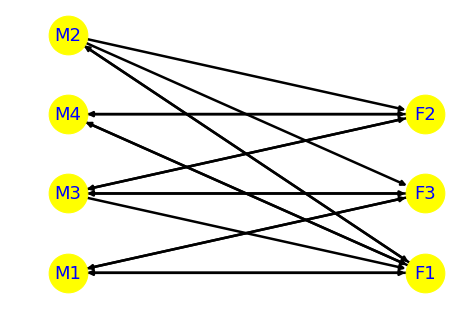

<Figure size 720x720 with 0 Axes>

          WEIGHT
(M1, F1)    0.25
(M1, F3)    0.75
(M2, F1)    0.25
(M2, F2)    0.25
(M2, F3)    0.50
(M3, F1)    0.50
(M3, F2)    0.25
(M3, F3)    0.25
(M4, F1)    0.25
(M4, F2)    0.75
(F1, M1)    0.50
(F1, M2)    0.25
(F1, M4)    0.25
(F2, M3)    0.50
(F2, M4)    0.50
(F3, M1)    0.75
(F3, M3)    0.25


In [5]:
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import random
X, Y = bipartite.sets(A)
pos = dict()
pos.update((n, (1, i)) for i, n in enumerate(X))
pos.update((n, (2, i)) for i, n in enumerate(Y))
edges, w = zip(*nx.get_edge_attributes(A,'weight').items())
nx.draw(A, pos=pos, node_color='yellow', node_size=1500, width=2.5)
nx.draw_networkx_labels(A, pos, font_size=18, font_family='sans-serif', font_color ='b')
plt.figure(figsize=(10,10))
plt.show()
print(pd.DataFrame(list(w), index=list(edges), columns=['WEIGHT']))

#### 1. Popularity

So who is the most popular person among the seven? And who is the most popular gentleman? Who is the most popular lady? The calculation of in-degree centrality proffers the results. A larger value of in-degree centrality means that that person is more popular than others.

In [6]:
in_degree_centrality = nx.in_degree_centrality(A)
in_degree_centrality

{'M1': 0.3333333333333333,
 'M2': 0.16666666666666666,
 'M3': 0.3333333333333333,
 'M4': 0.3333333333333333,
 'F1': 0.6666666666666666,
 'F2': 0.5,
 'F3': 0.5}

As you can see, 'F1' is the most popular among all and, of course, among ladies. 'M1', 'M3' and 'M4' are equally popular. 'M2' is the least popular male. He is also the least popular among all. This is easy to find out as many people on the Internet argue that 'M2' is not good at dating girls.

#### 2. Hypothesized Scenario: Random Walk of a Gift

Suppose there is a gift randomly given to a person among the seven. That person needs to give the gift to the person he/she likes. And then the receiver of the gift needs to give it the person he/she likes. This process repeats for multiple times. Suppose that the process repeats infinitely, what will be the probability for the gift landing on each person eventually? To answer this question, I simply apply the pagerank algorithm, which is based on the Markov Process model. The values corresponding to the person below are the probabilities.

In [7]:
pagerank = nx.pagerank(A)
pagerank

{'M1': 0.22212146320414447,
 'M2': 0.0542755979053056,
 'M3': 0.12077423629580764,
 'M4': 0.10862164983184025,
 'F1': 0.15457328014918129,
 'F2': 0.12787239407357914,
 'F3': 0.21176137854014176}

Eventually, the gift will be most likely to be received by 'M1' and 'F3'. 'M2' has a very small probability to receive the gift eventually.